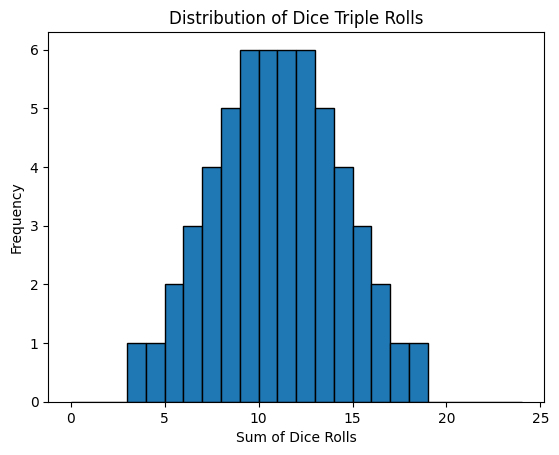

In [69]:
import matplotlib.pyplot as plt
import numpy as np

rolls = [sum([a,b,c]) for a in range(1,7) for b in range(a,7) for c in range(b,7) if not (c==a+b and c+a+b>12)]



plt.hist(rolls, bins=range(0, 25), edgecolor='black')
plt.xlabel('Sum of Dice Rolls')
plt.ylabel('Frequency')
plt.title('Distribution of Dice Triple Rolls')
plt.show()




In [120]:
import random

class question_two:
    def __init__(self):
        pass

    def roll(self):
        return random.randint(1, 6)

    def simulate_rolls_a(self, number_of_rolls : int):
        for i in range(number_of_rolls):
            if self.roll() == 6:
                return True
        return False

    def simulate_rolls_b(self, number_of_rolls : int):
        total = 0
        for i in range(number_of_rolls):
            if self.roll() == 6:
                total +=1
                if total == 2:
                    return True
        return False
    
    def calculate_probability_a(self, number_of_trials : int, number_of_rolls:int):
        total = 0
        for _ in range(number_of_trials):
            if self.simulate_rolls_a(number_of_rolls):
                total+=1
        return total/number_of_trials

    def calculate_probability_b(self, number_of_trials : int, number_of_rolls:int):
        total = 0
        for _ in range(number_of_trials):
            if self.simulate_rolls_b(number_of_rolls):
                total+=1
        return total/number_of_trials
            

cool_class = question_two()
question_two_a = cool_class.calculate_probability_a(10000000, 4)
question_two_b = cool_class.calculate_probability_b(10000000, 24)
print(question_two_a,question_two_b)


0.5177815 0.927157


In [17]:
import random

def lotto_simulator():
    numbers = list(range(1, 50))
    draws = 0
    history = set()

    while True:
        draws += 1
        random.shuffle(numbers)
        combination = tuple(sorted(numbers[:6]))

        if combination in history:
            return draws

        history.add(combination)


simulations = 10
total_draws = 0

for _ in range(simulations):
    total_draws += lotto_simulator()

average_draws = total_draws / simulations

print("Average number of draws for a repeat:", average_draws)


Average number of draws for a repeat: 3847.3


the average number of double rolls until we achieve double 6s: 36.914


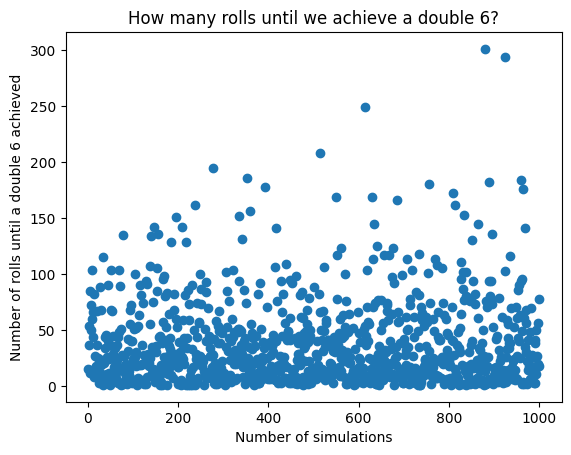

In [81]:
import random
import matplotlib.pyplot as plt

class question_four:
    def __init__(self, simulations = 100 ) -> None:
        self.history = []
        self.simulations = simulations
        self.averages = self.keep_them_rolling()
        self.draw()

    def roll(self) -> int:
        return random.randint(1,6)


    def roll_until_double_six(self) -> list:
        while True:
            my_rolls = (self.roll(),self.roll())
            self.history.append(my_rolls)
            if my_rolls == (6,6):
                length = len(self.history)
                self.history = []
                return length

    def keep_them_rolling(self) -> list:
        averages = []
        for _ in range(self.simulations):
            averages.append(self.roll_until_double_six())
        return averages
    

    def draw(self):
        print(f'the average number of double rolls until we achieve double 6s: {sum(self.averages)/len(self.averages)}')
        plt.scatter(range(1,self.simulations+1),self.averages)
        plt.xlabel('Number of simulations')
        plt.ylabel('Number of rolls until a double 6 achieved')
        plt.title('How many rolls until we achieve a double 6?')
        plt.show()
        

calling = question_four(1000)
